# 第6章: 英語テキストの処理
英語のテキスト（[nlp.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt)）に対して，以下の処理を実行せよ．

## 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [1]:
import re

def output_line(text="nlp.txt"):
    output = []
    pattern = r"(.*?[.;:?!]) (?=[A-Z])"
    prog = re.compile(pattern)
    with open(text,'r') as f:
        line = f.readline()
        while line:
            line = prog.findall(line)
            if 0 < len(line):
                output += line
            line = f.readline()
    return output

In [2]:
for line in output_line("nlp.txt"):
    print(line)

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.
As such, NLP is related to the area of humani-computer interaction.
The history of NLP generally starts in the 1950s, although work can be found from earlier periods.
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.
The authors claimed that within three or five years, machine translation would be a solved problem.
However, real progress was much slower, and after the ALPAC report in 1966, which found that ten year long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced.
Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psych

## 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [3]:
def output_word():
    output= []
    for line in output_line():
        pattern = r"[^a-zA-Z0-9\s]"
        prog = re.compile(pattern)
        line = prog.sub('',line)
        word_list = line.split(' ')
        output += word_list + ['\n']
    return output
            
        
for word in output_word():
    print(word)

Natural
language
processing
NLP
is
a
field
of
computer
science
artificial
intelligence
and
linguistics
concerned
with
the
interactions
between
computers
and
human
natural
languages


As
such
NLP
is
related
to
the
area
of
humanicomputer
interaction


The
history
of
NLP
generally
starts
in
the
1950s
although
work
can
be
found
from
earlier
periods


The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English


The
authors
claimed
that
within
three
or
five
years
machine
translation
would
be
a
solved
problem


However
real
progress
was
much
slower
and
after
the
ALPAC
report
in
1966
which
found
that
ten
year
long
research
had
failed
to
fulfill
the
expectations
funding
for
machine
translation
was
dramatically
reduced


Some
notably
successful
NLP
systems
developed
in
the
1960s
were
SHRDLU
a
natural
language
system
working
in
restricted
blocks
worlds
with
restricted
vocabularies
and
ELIZA
a
simulation
of
a
Rogerian
psychotherapist
wr

## 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装として[stemming](https://pypi.python.org/pypi/stemming)モジュールを利用するとよい．

In [4]:
from stemming.porter2 import stem

for word in output_word():
    print(word,stem(word),sep='\t')

Natural	Natur
language	languag
processing	process
NLP	NLP
is	is
a	a
field	field
of	of
computer	comput
science	scienc
artificial	artifici
intelligence	intellig
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
natural	natur
languages	languag

	

As	As
such	such
NLP	NLP
is	is
related	relat
to	to
the	the
area	area
of	of
humanicomputer	humanicomput
interaction	interact

	

The	The
history	histori
of	of
NLP	NLP
generally	general
starts	start
in	in
the	the
1950s	1950s
although	although
work	work
can	can
be	be
found	found
from	from
earlier	earlier
periods	period

	

The	The
Georgetown	Georgetown
experiment	experi
in	in
1954	1954
involved	involv
fully	fulli
automatic	automat
translation	translat
of	of
more	more
than	than
sixty	sixti
Russian	Russian
sentences	sentenc
into	into
English	English

	

The	The
authors	author
claimed	claim
that	that
within	within
three	three
or	or
five	five
years	year
machine	mac

## 53. Tokenization
[Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/)を用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [5]:
!cat nlp.txt | sh ./stanford-corenlp-full-2018-10-05/corenlp.sh -annotators tokenize,ssplit,parse,pos,lemma,ner,coref> 53.xml

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator parse
[main] INFO edu.stanford.nlp.parser.common.ParserGrammar - Loading parser from serialized file edu/stanford/nlp/models/lexparser/englishPCFG.ser.gz ... done [0.6 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.1 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [1.6 sec

In [6]:
from bs4 import BeautifulSoup
file = open('53.xml','r')
soup = BeautifulSoup(file,'lxml')
for root in soup.find_all("root"):
    for sentences in root.find_all("sentences"):
        for tokens in sentences.find_all("tokens"):
            for token in tokens.find_all("token"):
                print(token.word.text)

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural
language
processing
-LRB-
NLP
-RRB-
is
a
field
of
computer
science
,
artificial
intelligence
,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
-LRB-
natural
-RRB-
languages
.
As
such
,
NLP
is
related
to
the
area
of
humani-computer
interaction
.
Many
challenges
in
NLP
involve
natural
language
understanding
,
that
is
,
enabling
computers
to
derive
meaning
from
human
or
natural
language
input
,
and
others
involve
natural
language
generation
.
History
The
history
of
NLP
generally
starts
in
the
1950s
,
although
work
can
be
found
from
earlier
periods
.
In
1950
,
Alan
Turing
published
an
article
titled
``
Computing
Machinery
and
Intelligence
''
which
proposed
what
is
now
called
the
Turing
test
as
a
criterion
of
intelligence
.
The
Georgetown
experiment
in
1954
involved
fully
automatic
translation
of
more
than
sixty
Russian
sentences
into
English
.
The
authors
claimed
that
within
three
or
five

## 54. 品詞タグ付け
[Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/)の解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [7]:
from bs4 import BeautifulSoup
file = open('53.xml','r')
soup = BeautifulSoup(file,'lxml')
for token in soup.find_all("token"):
    if token:
        word,lemma,pos = token.word.text,token.lemma.text,token.pos.text
        print("word:{:<20}\tlemma:{:<20}\tpos:{:<20}".format(word,lemma,pos))

word:Natural             	lemma:natural             	pos:JJ                  
word:language            	lemma:language            	pos:NN                  
word:processing          	lemma:processing          	pos:NN                  
word:From                	lemma:from                	pos:IN                  
word:Wikipedia           	lemma:Wikipedia           	pos:NNP                 
word:,                   	lemma:,                   	pos:,                   
word:the                 	lemma:the                 	pos:DT                  
word:free                	lemma:free                	pos:JJ                  
word:encyclopedia        	lemma:encyclopedia        	pos:NN                  
word:Natural             	lemma:natural             	pos:JJ                  
word:language            	lemma:language            	pos:NN                  
word:processing          	lemma:processing          	pos:NN                  
word:-LRB-               	lemma:-lrb-               	pos:-LRB-  

word:learning            	lemma:learn               	pos:VBG                 
word:research            	lemma:research            	pos:NN                  
word:is                  	lemma:be                  	pos:VBZ                 
word:to                  	lemma:to                  	pos:TO                  
word:understand          	lemma:understand          	pos:VB                  
word:more                	lemma:more                	pos:JJR                 
word:about               	lemma:about               	pos:IN                  
word:human               	lemma:human               	pos:JJ                  
word:language            	lemma:language            	pos:NN                  
word:acquisition         	lemma:acquisition         	pos:NN                  
word:,                   	lemma:,                   	pos:,                   
word:or                  	lemma:or                  	pos:CC                  
word:psycholinguistics   	lemma:psycholinguistic    	pos:NNS    

## 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [8]:
for token in soup.find_all("token"):
    if token.ner.text == "PERSON":
        print(token.word.text)

Alan
Turing
Joseph
Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


## 56. 共参照解析
[Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/)の共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

In [9]:
from collections import defaultdict

#[(start),(end),(representative)]

for root in soup.find_all("root"):
    mention_dict = defaultdict(list)
    for coreferences in root.find_all("coreference"):
        for coreference in coreferences.find_all("coreference"):
            representative = coreference.find("mention",representative="true")
            if representative is not None:
                representative = re.search(r'<text>(?P<text>.*?)</text>',str(representative)).group("text")
            for mention in coreference.find_all("mention")[1:]:
                sentence_id = int(mention.sentence.text)
                start = int(mention.start.text)
                end = int(mention.end.text)
            mention_dict[sentence_id].append([start,end,representative])

# for root in soup.find_all("root"):
    for sentence in root.find_all("sentence"):
        sentence_id = sentence.get("id")
        sentence_id = int(sentence_id) if sentence_id else sentence_id
        tikan = mention_dict.get(sentence_id)
#         print(tikan)
        for tokens in sentence.find_all("tokens"):
            sentence = []
            for token in tokens.find_all("token"):
#                 print(token.word.text)
                sentence.append(token.word.text)
            if tikan is not None:
                for start,end,representative in tikan:
                    start-=1
                    end-=1
                    sentence[end-1] = representative + ' (' + sentence[end-1] + ')'
#                     print(sentence[start:end],representative)
            print(' '.join(sentence))

Natural language processing
From Wikipedia , the free encyclopedia
Natural language processing -LRB- NLP -RRB- is a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages .
As such , NLP is related to the area of humani-computer interaction .
Many challenges in NLP (NLP) involve natural language understanding , that is , enabling computers to derive meaning from human or natural language input , and others involve natural language generation .
History
The history of NLP generally starts in the 1950s , although work can be found from earlier periods .
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the Turing test as a criterion of intelligence .
The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English .
The authors claimed that within three o

## 57. 係り受け解析
[Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/)の係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木を[DOT言語](http://ja.wikipedia.org/wiki/DOT%E8%A8%80%E8%AA%9E)に変換し，[Graphviz](http://www.graphviz.org/)を用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，[pydot](https://code.google.com/p/pydot/)を使うとよい．

In [10]:
from graphviz import Digraph
from IPython.display import Image

def showGraph(target=1):
    G = Digraph(format='png')
    G.graph_attr['rankdir'] = 'LR'

    sentence = soup.find_all("sentence")[target]
    
    for dependencies in sentence.find_all("dependencies",type="collapsed-dependencies"):
        for _dep in dependencies.find_all("dep"):
            gov=_dep.governor.text
            gov_id = _dep.governor.get("idx")
            dep = _dep.dependent.text
            dep_id = _dep.dependent.get("idx")
            if gov != "ROOT":
                G.node(gov_id,gov)
                G.node(dep_id,dep)
                G.edge(gov_id,dep_id)

    return Image(G.render("graph"))

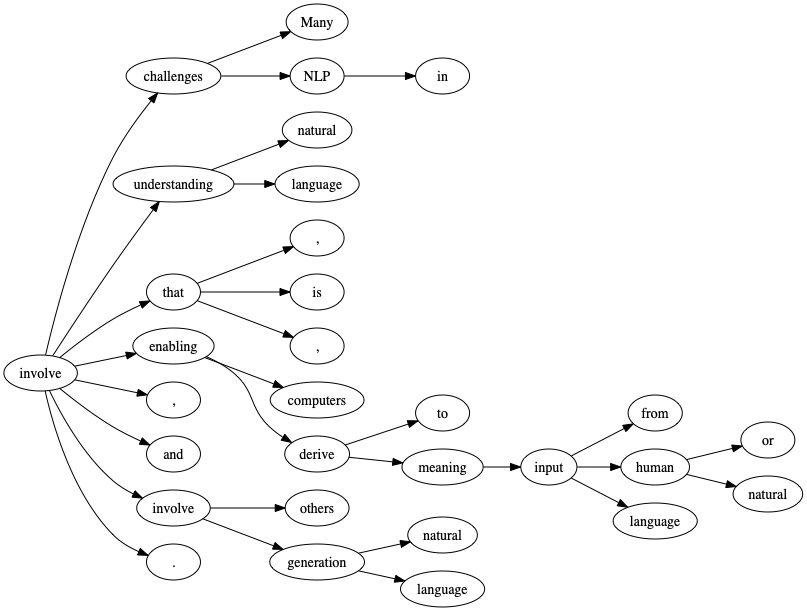

In [11]:
showGraph(4)

## 58. タプルの抽出
[Stanford Core NLP](http://nlp.stanford.edu/software/corenlp.shtml)の係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

- 述語: nsubj関係とdobj関係の子（dependent）を持つ単語
- 主語: 述語からnsubj関係にある子（dependent）
- 目的語: 述語からdobj関係にある子（dependent）

In [12]:
SV_dict = dict()
VO_dict = dict()
for sentence in soup.find_all("sentence"):
    for dependencies in sentence.find_all("dependencies",type="collapsed-dependencies"):
        for dep in dependencies.find_all("dep",type="nsubj"):
            V = dep.governor.text
            S = dep.dependent.text
            SV_dict[S] = V
        for dep in dependencies.find_all("dep",type="dobj"):
            V =dep.governor.text
            O = dep.dependent.text
            VO_dict[V] = O
for S,V in SV_dict.items():
    O = VO_dict.get(V)
    if O:
        print(S,V,O,sep='\t')
        

challenges	involve	generation
others	involve	generation
Turing	published	article
experiment	involved	coding
patient	exceeded	base
introduction	learning	approaches
underpinnings	discouraged	sort
that	make	decisions
Some	produced	systems
Part	introduced	use
models	have	advantages
algorithms	take	set
implementations	involved	coding
they	express	certainty
Systems	have	advantages
procedures	make	decisions


## 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

In [14]:
def ParseNP(parse):
    e_type = re.match(r'\((?P<text>.*?) ',parse).group("text")
    bracket = 0
    start = 0
    contents = []
    elements = []
    for i in range(1,len(parse)):
        if parse[i] == '(':
            if bracket == 0:
                start = i
            bracket += 1

        elif parse[i] == ')':
            bracket -= 1
            if bracket == 0:
                contents.append(parse[start:i+1])
    
    if len(contents) == 0:
        element = re.search(r' (?P<text>.*?)\)',parse).group("text")
        return [element]

    for content in contents:
        elements += (ParseNP(content))
        
    if e_type == "NP":
        print(' '.join(elements))
    
    return (elements)

In [15]:
for root in soup.find_all("root"):
    for sentences in root.find_all("sentences"):
        for sentence in sentences.find_all("sentence"):
            for parse in sentence.find_all("parse"):
                ParseNP(parse.text)

Natural language processing
Wikipedia
the free encyclopedia
Wikipedia , the free encyclopedia
Natural language processing
NLP
Natural language processing -LRB- NLP -RRB-
a field
computer science
a field of computer science
artificial intelligence
linguistics
the interactions
computers
human -LRB- natural -RRB- languages
computers and human -LRB- natural -RRB- languages
the interactions between computers and human -LRB- natural -RRB- languages
linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
a field of computer science , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages
such
NLP
the area
humani-computer interaction
the area of humani-computer interaction
Many challenges
NLP
Many challenges in NLP
natural language understanding
computers
human or natural language input
others
natural language generation
History
The history
NLP
The history of NLP
the 1950s